#  Exploratory Data Analysis on Dataset - Terrorism

# Importing the necessary libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the dataset

In [10]:
data = pd.read_csv("Downloads/terrorism.csv", encoding = 'ISO-8859-1')

In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Displaying the last five rows of the dataset

In [12]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


# Displaying the shape and features of the dataset

In [13]:
data.shape

(181691, 135)

# Displaying all the features present in the dataset

In [14]:
for column in data.columns:
  print(column)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

# Feature Selection

In [15]:
df = data[["iyear", "imonth", "iday", "country_txt", "provstate", "region_txt", 
           "longitude", "latitude", "attacktype1_txt", "target1", "nkill", "nwound", 
           "summary", "gname", "targtype1_txt", "weaptype1_txt", "motive"]]

In [16]:
df.head()

,iyear,imonth,iday,country_txt,provstate,region_txt,longitude,latitude,attacktype1_txt,target1,nkill,nwound,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,-69.951164,18.456792,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,-99.086624,19.371887,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,120.599741,15.478598,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,23.762728,37.997490,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,130.396361,33.580412,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


# Renaming the columns of the dataset

In [17]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State', 
                    'region_txt':'Region','longitude':'Longitude', 'latitude':'Latitude', 'attacktype1_txt':'AttackType',
                    'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                    'targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df.head()

,Year,Month,Day,Country,State,Region,Longitude,Latitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,-69.951164,18.456792,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,-99.086624,19.371887,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,120.599741,15.478598,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,23.762728,37.997490,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,130.396361,33.580412,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


# Displaying the shape and info of the data

In [18]:
df.shape

(181691, 17)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   Longitude    177134 non-null  float64
 7   Latitude     177135 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Target       181055 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


# Checking for the duplicate values

In [20]:
duplicate_values = data.duplicated()
duplicate_values.value_counts() #There are 17 duplicate rows

False    181691
dtype: int64

In [21]:
df.drop_duplicates(subset =None, keep='first', inplace = True)
df

,Year,Month,Day,Country,State,Region,Longitude,Latitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,-69.951164,18.456792,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,-99.086624,19.371887,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,120.599741,15.478598,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,23.762728,37.997490,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,130.396361,33.580412,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,45.385034,2.359673,Armed Assault,Checkpoint,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,35.942679,35.407278,Bombing/Explosion,Hmeymim Air Base,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,124.437908,6.900742,Facility/Infrastructure Attack,Houses,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,93.940430,24.798346,Bombing/Explosion,Office,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


# Finding out the number of unique values

In [22]:
df.nunique()

Year               47
Month              13
Day                32
Country           205
State            2855
Region             12
Longitude       48039
Latitude        48322
AttackType          9
Target          86006
Killed            205
Wounded           238
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

# Checking for null values

In [23]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
Longitude        3977
Latitude         3976
AttackType          0
Target            544
Killed           9412
Wounded         15246
Summary         59038
Group               0
Target_type         0
Weapon_type         0
Motive         122224
dtype: int64

In [24]:
df['Killed'].fillna(0, inplace = True)
df['Wounded'].fillna(0, inplace = True)
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
Longitude        3977
Latitude         3976
AttackType          0
Target            544
Killed              0
Wounded             0
Summary         59038
Group               0
Target_type         0
Weapon_type         0
Motive         122224
dtype: int64

# Drawing Insights

In [25]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['State'].value_counts().idxmax()) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Description of the data

In [26]:
df.describe(include = 'all')

,Year,Month,Day,Country,State,Region,Longitude,Latitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
count,172129.000000,172129.000000,172129.000000,172129,171708,172129,1.681520e+05,168153.000000,172129,171585,172129.000000,172129.000000,113091,172129,172129,172129,49905
unique,NaN,NaN,NaN,205,2855,12,NaN,NaN,9,86006,NaN,NaN,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,NaN,NaN,Bombing/Explosion,Civilians,NaN,NaN,10/09/2012: Assailants threw incendiary device...,Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,23456,7625,48714,NaN,NaN,82126,6369,NaN,NaN,7,79800,41478,86345,14787
mean,2003.056051,6.470060,15.518431,NaN,NaN,NaN,-4.830590e+02,23.779955,NaN,NaN,2.371553,3.025725,NaN,NaN,NaN,NaN,NaN
std,13.189553,3.391747,8.814150,NaN,NaN,NaN,2.101771e+05,18.295387,NaN,NaN,11.512104,35.238402,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-8.618590e+07,-53.154613,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,7.417291e+00,11.840929,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,4.352619e+01,31.528200,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,6.896761e+01,34.666667,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN


# Data Visualisation

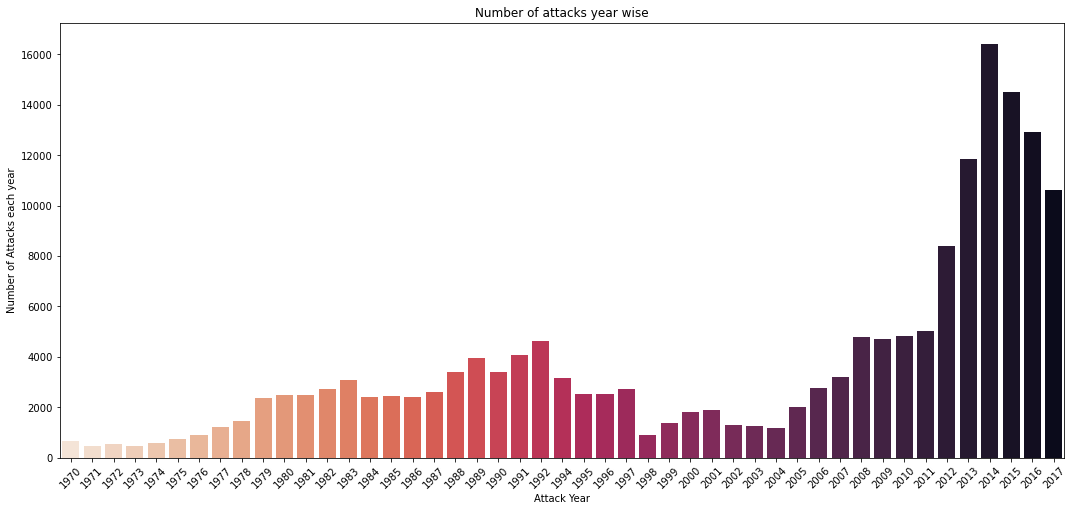

In [27]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,8))
sns.barplot(x = x_year, y = y_count_years, palette = 'rocket_r')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Number of attacks year wise')
plt.show()

# Observations:

Maximum number of attacks took place in the year 2014.
The number of attacks have been gradually decreasing since then.

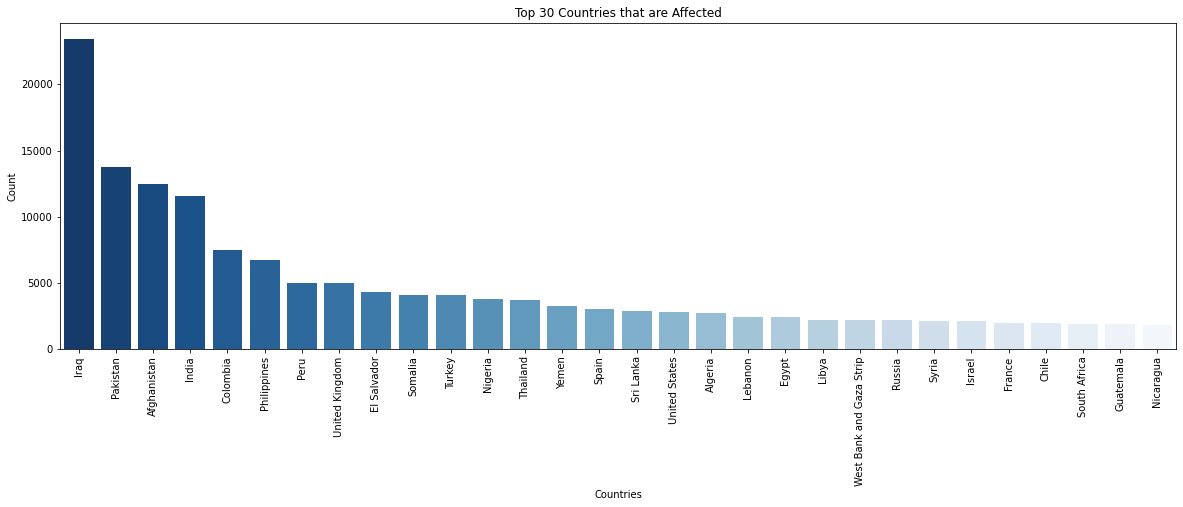

In [28]:
plt.subplots(figsize=(20,6))
sns.barplot(df['Country'].value_counts()[:30].index,df['Country'].value_counts()[:30].values,palette='Blues_r')
plt.title('Top 30 Countries that are Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Observations:

The country that is most affected by these attacks is Iraq, followed by Pakistan and Afghanistan.
Least number of terrorist attacks have taken place in Nicargua.

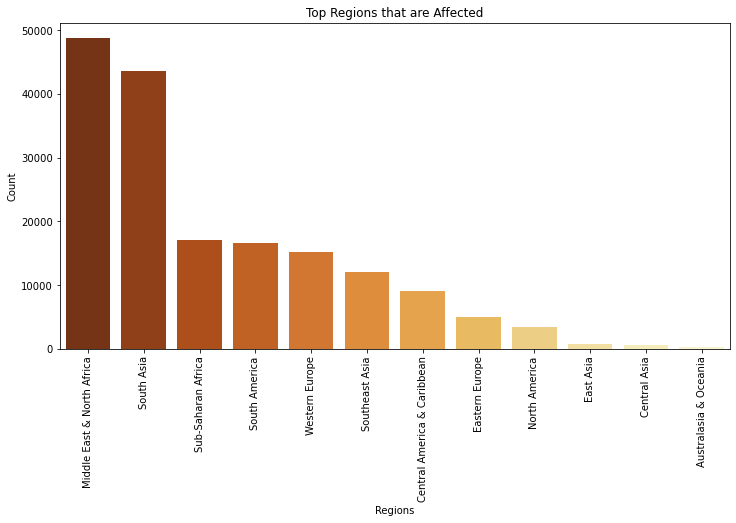

In [29]:
plt.subplots(figsize=(12,6))
sns.barplot(df['Region'].value_counts().index,df['Region'].value_counts().values,palette='YlOrBr_r')
plt.title('Top Regions that are Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Observations:

Middle East & North America is the most affected region.
The most peaceful region is Australia & Oceania with minimum number of terrorist attacks.

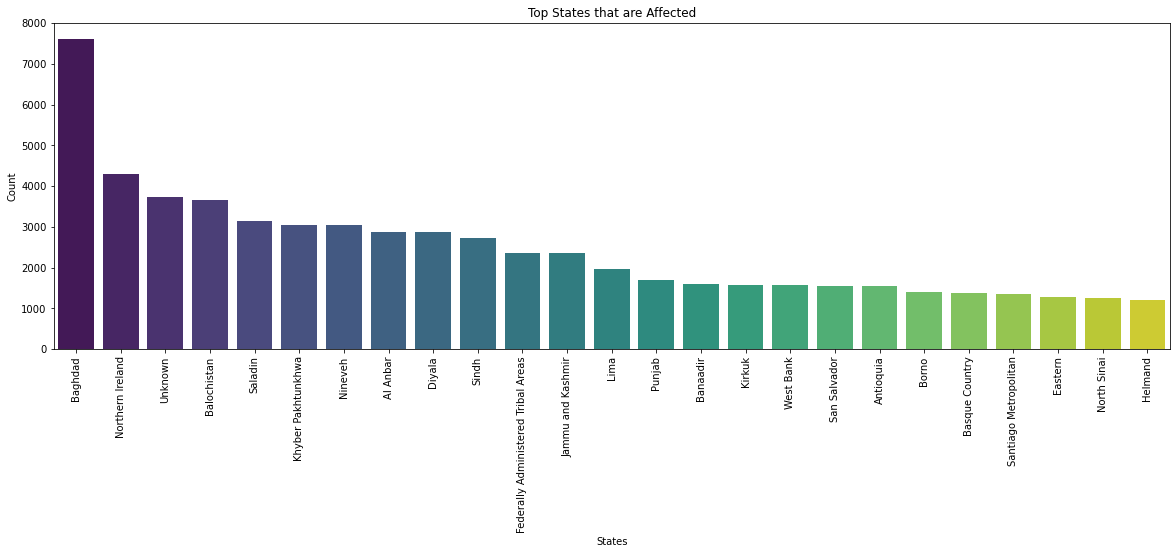

In [30]:
plt.subplots(figsize=(20,6))
sns.barplot(df['State'].value_counts()[:25].index,df['State'].value_counts()[:25].values,palette='viridis')
plt.title('Top States that are Affected')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Observations:

Baghdad is the most affected state, followed by Northern Ireland.

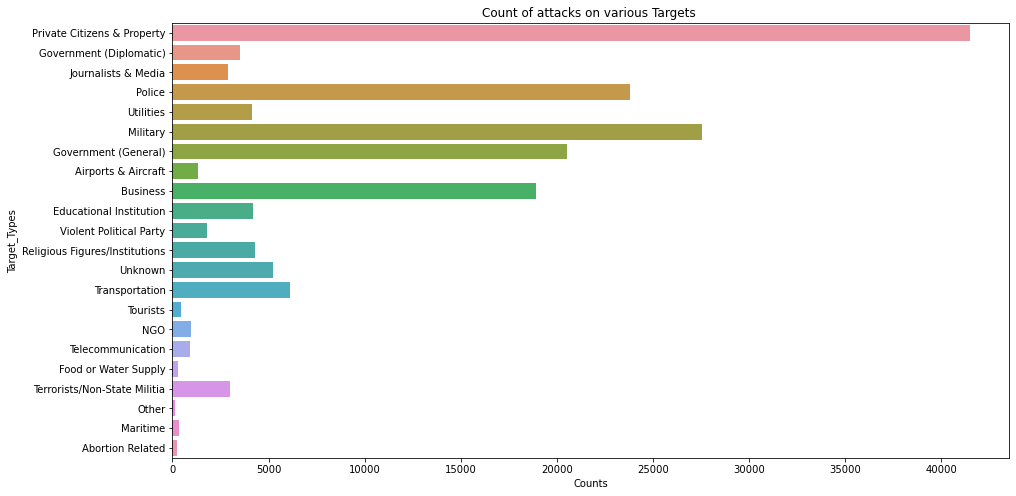

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['Target_type'])
plt.title('Count of attacks on various Targets ')
plt.xlabel('Counts')
plt.ylabel('Target_Types')
plt.show()

# Observations:

Majority of the terrorists targets the Private Citizens and their properties and Military.

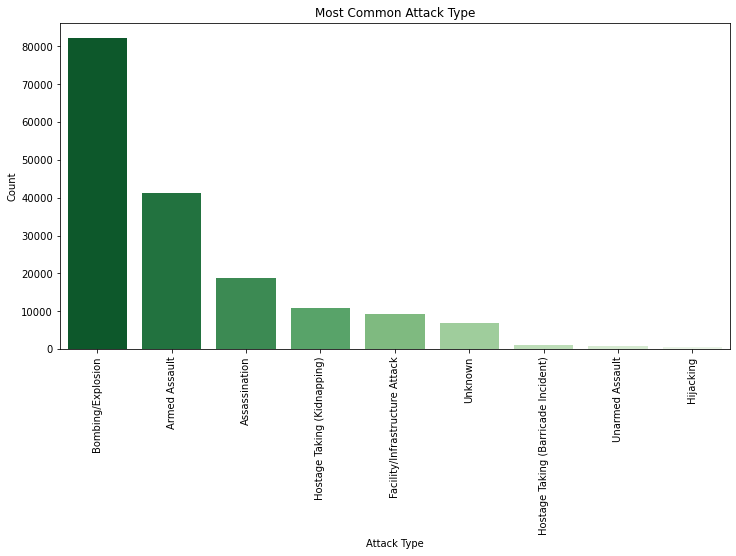

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['AttackType'].value_counts().index,y = df['AttackType'].value_counts().values, palette = 'Greens_r')
plt.title('Most Common Attack Type')
plt.xlabel('Attack Type')
plt.xticks(rotation= 90)
plt.ylabel('Count')
plt.show()

# Observations:

The most common attack type is Bombing/Explosion.
The least common is hijacking.

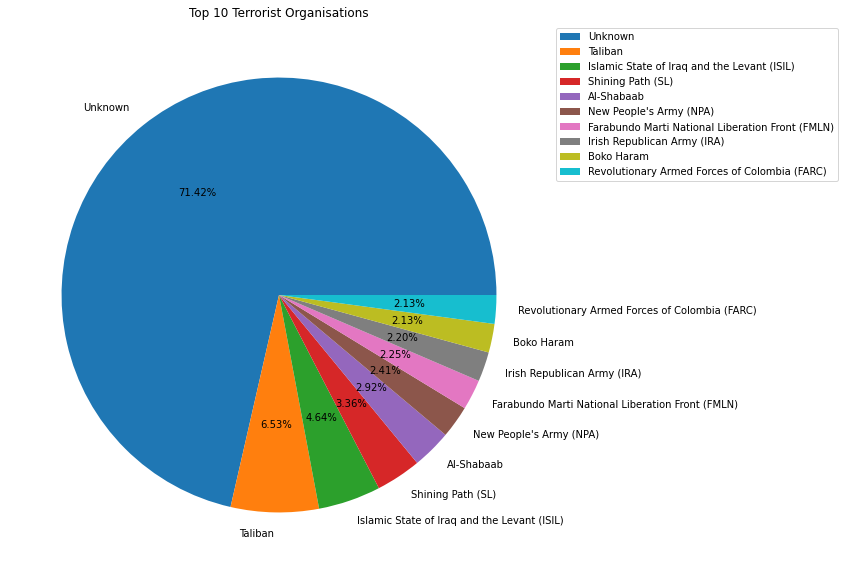

In [33]:
plt.figure(figsize = (10, 10))
plt.pie(df['Group'].value_counts()[:10].values,labels=df['Group'].value_counts()[:10].index,autopct='%1.2f%%'  )
plt.title('Top 10 Terrorist Organisations')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

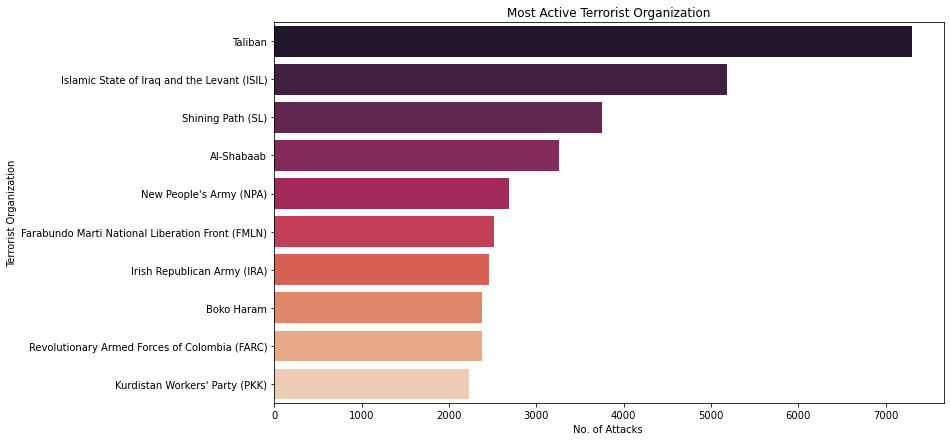

In [34]:
fig=plt.figure(figsize=(12,7))
sns.barplot(x = df['Group'].value_counts()[1:11].values, y = df['Group'].value_counts()[1:11].index, palette='rocket')
plt.xlabel("No. of Attacks ")
plt.ylabel("Terrorist Organization")
plt.title("Most Active Terrorist Organization")
plt.show()

# Observations:
Taliban is the most active terrorist organisation followed by ISIL, Shining Path and so on.

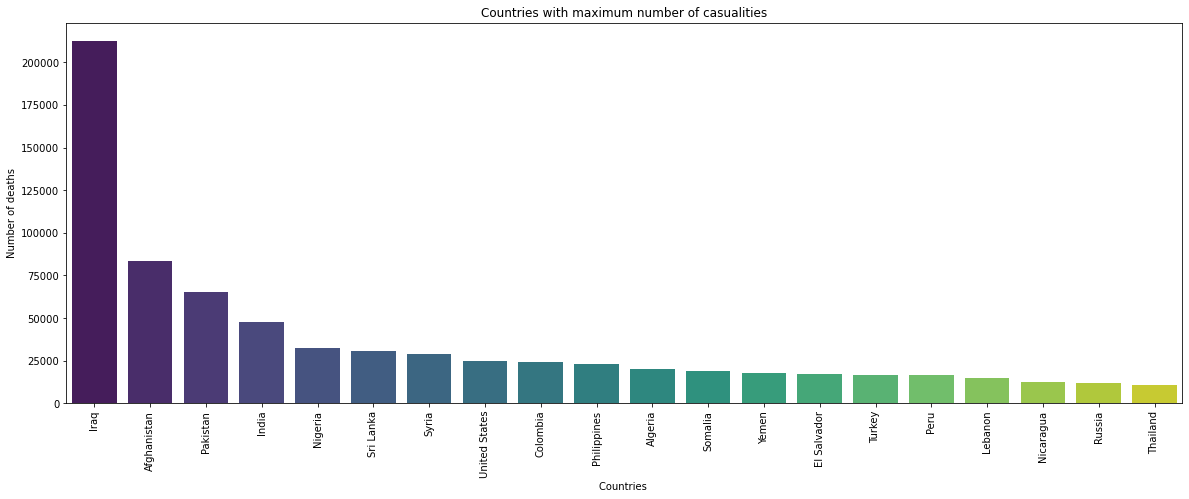

In [35]:
Casualities = df.groupby(['Country'], dropna = False)['Killed','Wounded'].sum()
Casualities['Casualities'] = Casualities.Killed + Casualities.Wounded
Casualities_sorted = Casualities.sort_values('Casualities', ascending = False)
Casualities_sorted['Country'] = Casualities_sorted.index
fig=plt.figure(figsize=(20,7))
sns.barplot(x = Casualities_sorted['Country'][:20], y = Casualities_sorted['Casualities'][:20], palette='viridis')
plt.xlabel("Countries ")
plt.ylabel("Number of deaths")
plt.xticks(rotation = 90)
plt.title("Countries with maximum number of casualities")
plt.show()

# Observations:
Iraq has the highest number of casualities till date, followed by Afghanistan, Pakistan and so on. Thailand has comapratively lesser number of casualities.

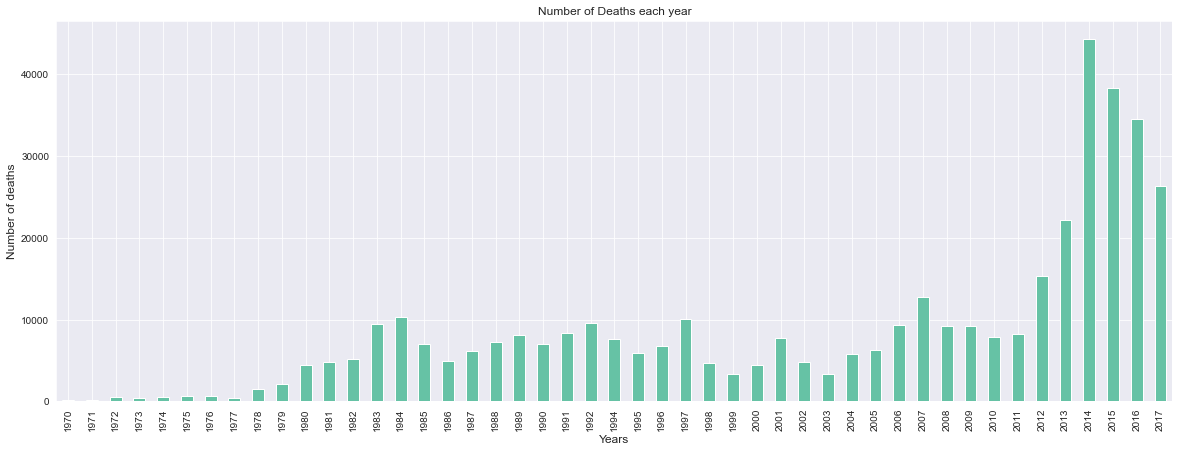

In [36]:
Death_each_year = df.groupby(['Year'], dropna = False)['Killed'].sum() 
fig=plt.figure(figsize=(20,7))
sns.set_style("darkgrid")
Death_each_year.plot(kind = 'bar', colormap = "Set2")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of deaths",fontsize = 12)
plt.xticks(rotation = 90)
plt.title("Number of Deaths each year")
plt.show()

# Observations:
The year 2014 saw the maximum number of deaths after which we see a decreasing trend but the number of deaths is still significantly high.

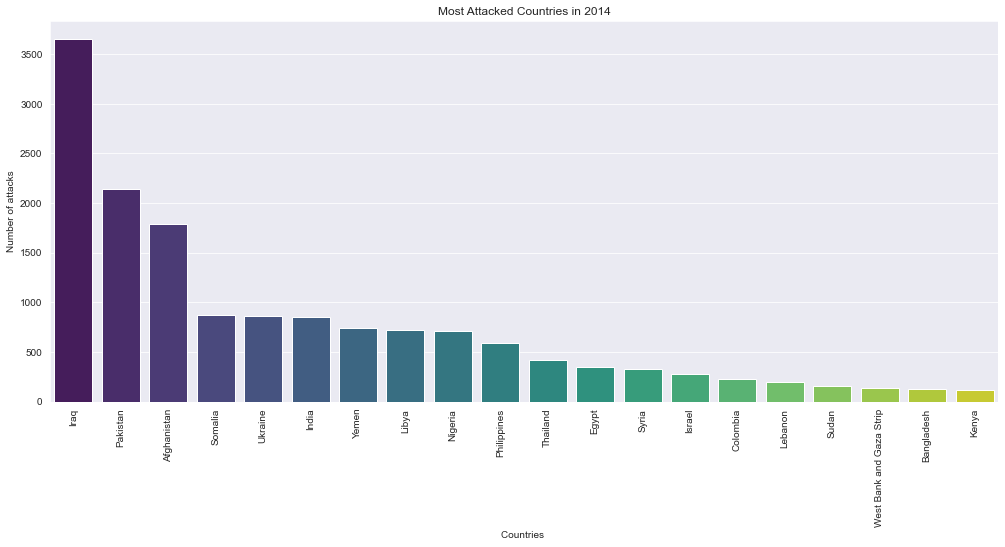

In [37]:
Attacks_2014 = df[df.Year == 2014]
fig=plt.figure(figsize=(17,7))
sns.barplot(x = Attacks_2014['Country'].value_counts()[:20].index, y = Attacks_2014['Country'].value_counts()[:20].values, palette='viridis')
plt.xlabel("Countries ")
plt.ylabel("Number of attacks")
plt.xticks(rotation = 90)
plt.title("Most Attacked Countries in 2014")
plt.show()

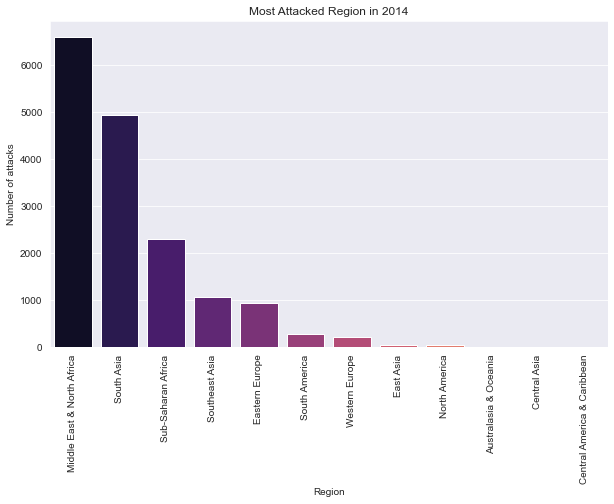

In [38]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x = Attacks_2014['Region'].value_counts()[:20].index, y = Attacks_2014['Region'].value_counts()[:20].values, palette='magma')
plt.xlabel("Region")
plt.ylabel("Number of attacks")
plt.xticks(rotation = 90)
plt.title("Most Attacked Region in 2014")
plt.show()

# Observations:

Iraq was most attacked country in the year 2014, followed by Pakistan.
Middle East & North Africa was most attacked region, followed by South Asia.

Text(0.5, 1.0, 'Number of Terrorist Attacks by Region in each year')

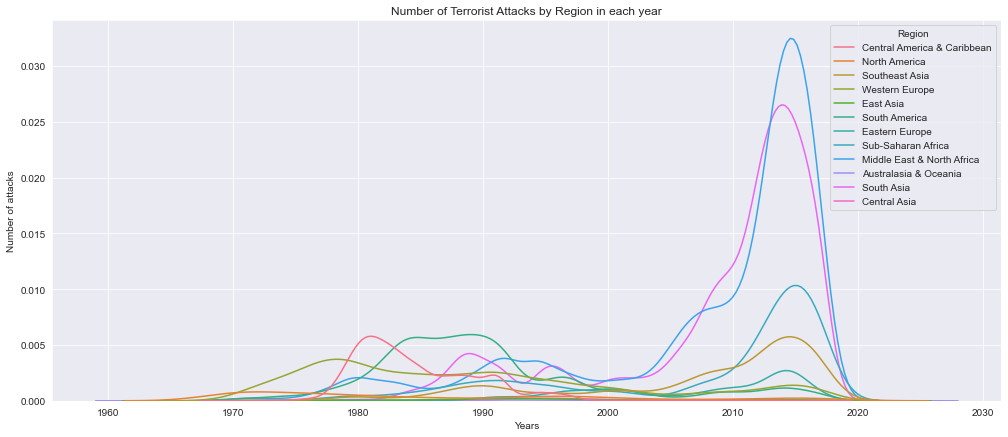

In [39]:
fig=plt.figure(figsize=(17,7))
sns.set_style("darkgrid")
sns.kdeplot(df['Year'], hue = df['Region'])
plt.xlabel("Years")
plt.ylabel("Number of attacks")
plt.title("Number of Terrorist Attacks by Region in each year")